In [54]:
import numpy as np
import matplotlib.pyplot as plt
from os import path
π = np.pi
import scipy.constants as constants

plt.style.use('notebook')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# Argon Adsorption inside MCM-41

In [2]:
m_mcm = 6.133 # g

# monolayer coverage
A = 8.994 #mmol/g

# pore diameter
D = 30 #Å

# thickness of Ar layer
w = 3.5 # Å

## Determining propertires of the argon monolayer

see: https://en.wikipedia.org/wiki/Noble_gas_(data_page) for gas data

In [3]:
# Argon mass
m_Ar = 39.948/constants.N_A # g

# Number of argon atoms
N_Ar = A*1E-3*m_mcm*constants.N_A

# volume of monolayer
V = 915*1E20*m_mcm*w

# number density of argon
n = N_Ar/V # 1/Å^3

## Number Density of Liquid Argon

In [4]:
ρ_Ar_liquid = 1393.9 # g/dm^3

n_Ar_liquid = ρ_Ar_liquid / m_Ar / (1E-3*1E30) # 1/Å^3

In [23]:
n_Ar_liquid

0.021012972215310656

## Number Density of Liquid Neon

In [5]:
m_Ne = 20.1797/constants.N_A # g

ρ_Ne_liquid = 1207 # g/dm^3

n_Ne_liquid = ρ_Ne_liquid / m_Ne / (1E-3*1E30) # 1/Å^3

In [29]:
n_Ne_liquid

0.03601998054678216

## Paul's Experimental Isotherms


### Ar/MCM-41

In [55]:
import colors as colortools
colors_spec = colortools.get_linear_colors('Spectral',8,reverse=False)
black = "#646362"

In [41]:
isotherm = {}
isotherm['Ar/MCM41'] = np.loadtxt('../Data/Sokol_Ar_MCM41_Isotherm.dat')
isotherm['He/Ar/MCM41'] = np.loadtxt('../Data/Sokol_He_Ar_MCM41_Isotherm.dat')

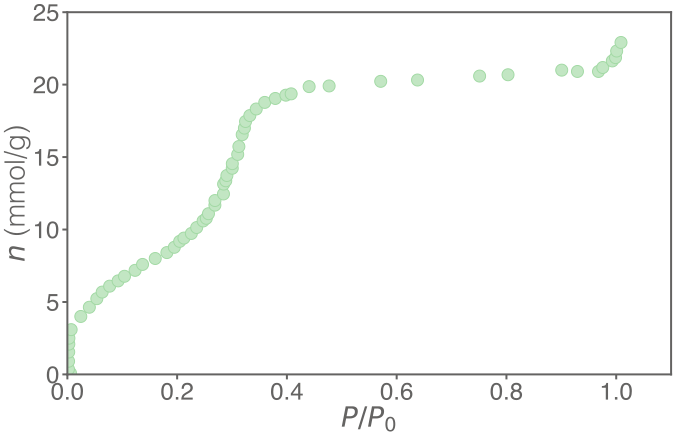

In [53]:
plt.style.reload_library()
with plt.style.context('presentation'):
    ax = plt.subplot(111)
    #ax.set_xscale("log", nonposx='clip')

    ax.plot(isotherm['Ar/MCM41'][:,0],isotherm['Ar/MCM41'][:,1],'o',ms=12, mec=colors_spec[5], 
            mfc=colortools.get_alpha_hex(colors_spec[5],0.65))
    
    ax.set_xlabel(r'$P/P_0$', color=black)
    ax.set_ylabel(r'$n$ (mmol/g)', color=black)
    
    [ax.spines[sp].set_color(black) for sp in ['bottom','top','left','right']]
    ax.xaxis.label.set_color(black)
    ax.tick_params(which='both', colors=black)
    ax.set_ylim(0,25)
    ax.set_xlim(0,1.1)
    plt.savefig('Ar_MCM41_isotherm.pdf')

### He/Ar/MCM-4

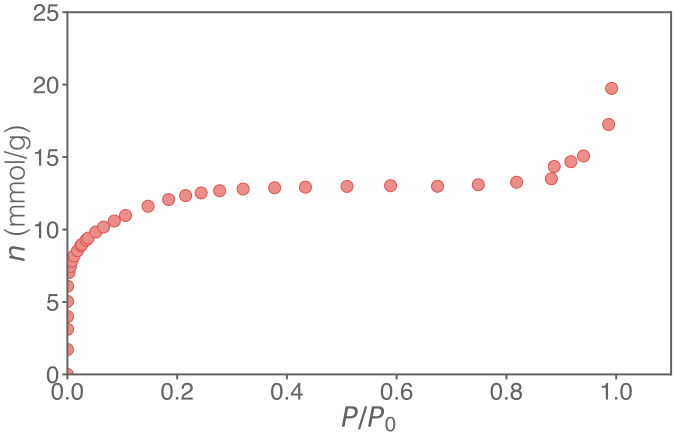

In [51]:
plt.style.reload_library()
with plt.style.context('presentation'):
    ax = plt.subplot(111)
    #ax.set_xscale("log", nonposx='clip')
    
    ax.plot(isotherm['He/Ar/MCM41'][:,0],isotherm['He/Ar/MCM41'][:,1],'o',ms=12, mec=colors_spec[1], 
            mfc=colortools.get_alpha_hex(colors_spec[1],0.65), mew=1)
    
    ax.set_xlabel(r'$P/P_0$', color=black)
    ax.set_ylabel(r'$n$ (mmol/g)', color=black)
    
    [ax.spines[sp].set_color(black) for sp in ['bottom','top','left','right']]
    ax.xaxis.label.set_color(black)
    ax.tick_params(which='both', colors=black)
    ax.set_ylim(0,25)
    ax.set_xlim(0,1.1)
    plt.savefig('He_Ar_MCM41_isotherm.pdf')